In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from utils import *
from frontend import solve, evaluate
import mlr as md
import fw

## Warehouse

We first generate some (artificial) data records and distribute them as an RDD. If you have already a correctly prepared RDD, then skip this step.

In [2]:
# X: n*p  W: p*m  Y: n*m
# =======================

# parameters
metadata = {'n':10000, 'm':100, 'p':100, 'r':10, 'nn':1, 'seed':0}
partition = 8  # >= number of cores

# generate data
data, W = md.generate(**metadata)

# prepare data
points = mat2point(*data)
dataRDD = sc.parallelize(points, partition)

## Optimization

We use the `solve` function from the `frontend` module to solve the minimization problem. It returns a Frank-Wolfe solution path, which is simply the set of singular vectors and step sizes it chooses during the optimization.

The following uses `DFW-Trace-1` as linear optimization oracle and a fixed step size.

In [15]:
# parameter
nn = 100      # trace norm constraint
T = 20

lmo = lambda rdd, **kwargs: fw.poweriter(rdd, lambda t: 1, 'random', **kwargs)  # power1
step = lambda **kwargs: fw.fixedstep(const=0.01)        # fixed step size

In [16]:
path = solve(dataRDD, metadata, md, nn, T, lmo, step)

## Evaluation

We use the `evaluate` function from the `frontend` module to evalute the objective function, the estimation error and/or the missclassification error. See its implementation to get a quick idea of obtaining the FW solution from its path.

In [17]:
loss, _, miss = evaluate(dataRDD, path, metadata, md, W)

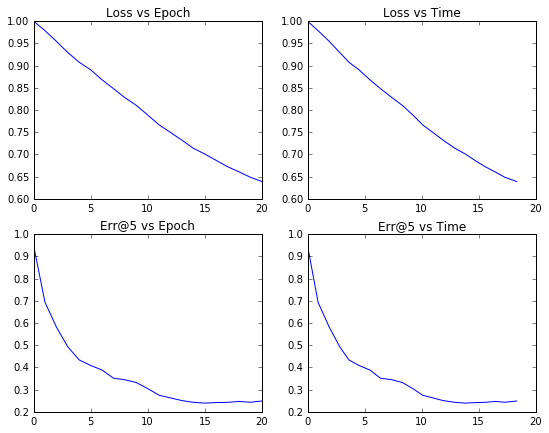

In [18]:
plt.figure(figsize=(9, 7))
plt.subplot(221)
plt.plot(loss)
plt.title('Loss vs Epoch')
plt.subplot(222)
plt.plot(path.timer, loss)
plt.title('Loss vs Time')
plt.subplot(223)
plt.plot(miss)
plt.title('Err@5 vs Epoch')
plt.subplot(224)
plt.plot(path.timer, miss)
plt.title('Err@5 vs Time')

The values decrease nicely.